In [1]:
import opendatasets as od
import os
import pandas as pd

C:\Users\igors\AppData\Local\Temp\ipykernel_34788\3724483110.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# insert ypu kaggle  username and key
od.download('https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small',data_dir="dataset")

Skipping, found downloaded files in "dataset\fashion-product-images-small" (use force=True to force download)


In [3]:
df = pd.read_csv('dataset/fashion-product-images-small/styles.csv', on_bad_lines='skip')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


### My personal data and model Exploration

In [4]:
# use either small or large dataset
SMALL_DATASET = True

In [5]:
# insert ypu kaggle  username and key
if (SMALL_DATASET):
    od.download('https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small',data_dir="dataset")

Skipping, found downloaded files in "dataset\fashion-product-images-small" (use force=True to force download)


In [6]:
if (SMALL_DATASET):
    df_data = pd.read_csv("dataset/fashion-product-images-small/styles.csv", on_bad_lines='skip')
    image_files = os.listdir("dataset/fashion-product-images-small/images")
else:
    df_data = pd.read_csv("../input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')
    image_files = os.listdir("../input/fashion-product-images-dataset/fashion-dataset/images")

### Clean Data from nulls and non existing images

In [7]:
df_data.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [8]:
df_data.dropna(inplace=True)

In [9]:
#check if file exists
df_data['file_found'] = df_data['id'].apply(lambda x: f"{x}.jpg" in image_files)

In [10]:
df_data['file_found'].value_counts()

file_found
True     44072
False        5
Name: count, dtype: int64

In [11]:
mask = df_data['file_found']
df_data = df_data[mask].reset_index(drop=True)

### Add paths to images and review dataset

In [12]:
# insert ypu kaggle  username and key
if (SMALL_DATASET):
    df_data['filename'] = df_data['id'].apply(lambda x: os.path.join("dataset/fashion-product-images-small/images/",str(x)+".jpg"))
else:
    df_data['filename'] = df_data['id'].apply(lambda x: os.path.join("../input/fashion-product-images-dataset/fashion-dataset/images/",str(x)+".jpg"))

In [13]:
df_data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,file_found,filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,True,dataset/fashion-product-images-small/images/15...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,True,dataset/fashion-product-images-small/images/39...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,True,dataset/fashion-product-images-small/images/59...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,True,dataset/fashion-product-images-small/images/21...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,True,dataset/fashion-product-images-small/images/53...


### Convert images to the numpy 3d matrix in order to later use them in the NN.
##### 3d matrix represents width, height and 3 colours

In [14]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [15]:
#normalize images by fixing width and height
if (SMALL_DATASET):
    IMAGE_WIDTH = 60
    IMAGE_HEIGHT = 60
else:
    IMAGE_WIDTH = 250
    IMAGE_HEIGHT = 250

In [16]:
def process_image(image_path):
    image = load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT,3))
    image = img_to_array(image)
    return image

In [17]:
def append_images(column):
    images = []
    for file_path in column:
        images.append(process_image(file_path))
    return np.array(images)

### Split Dataset and Encode Labels

In [18]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [19]:
output_lables = ["gender","masterCategory","subCategory","articleType","baseColour","season","usage"]

In [20]:
X_filepath= df_data["filename"]

In [21]:
X_images = append_images(X_filepath)

### Create a modell

In [22]:
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense,BatchNormalization, MaxPooling2D, Conv2D, Activation, Input, Flatten,Dropout)

In [23]:
model = keras.saving.load_model('models/basis_model.keras') 

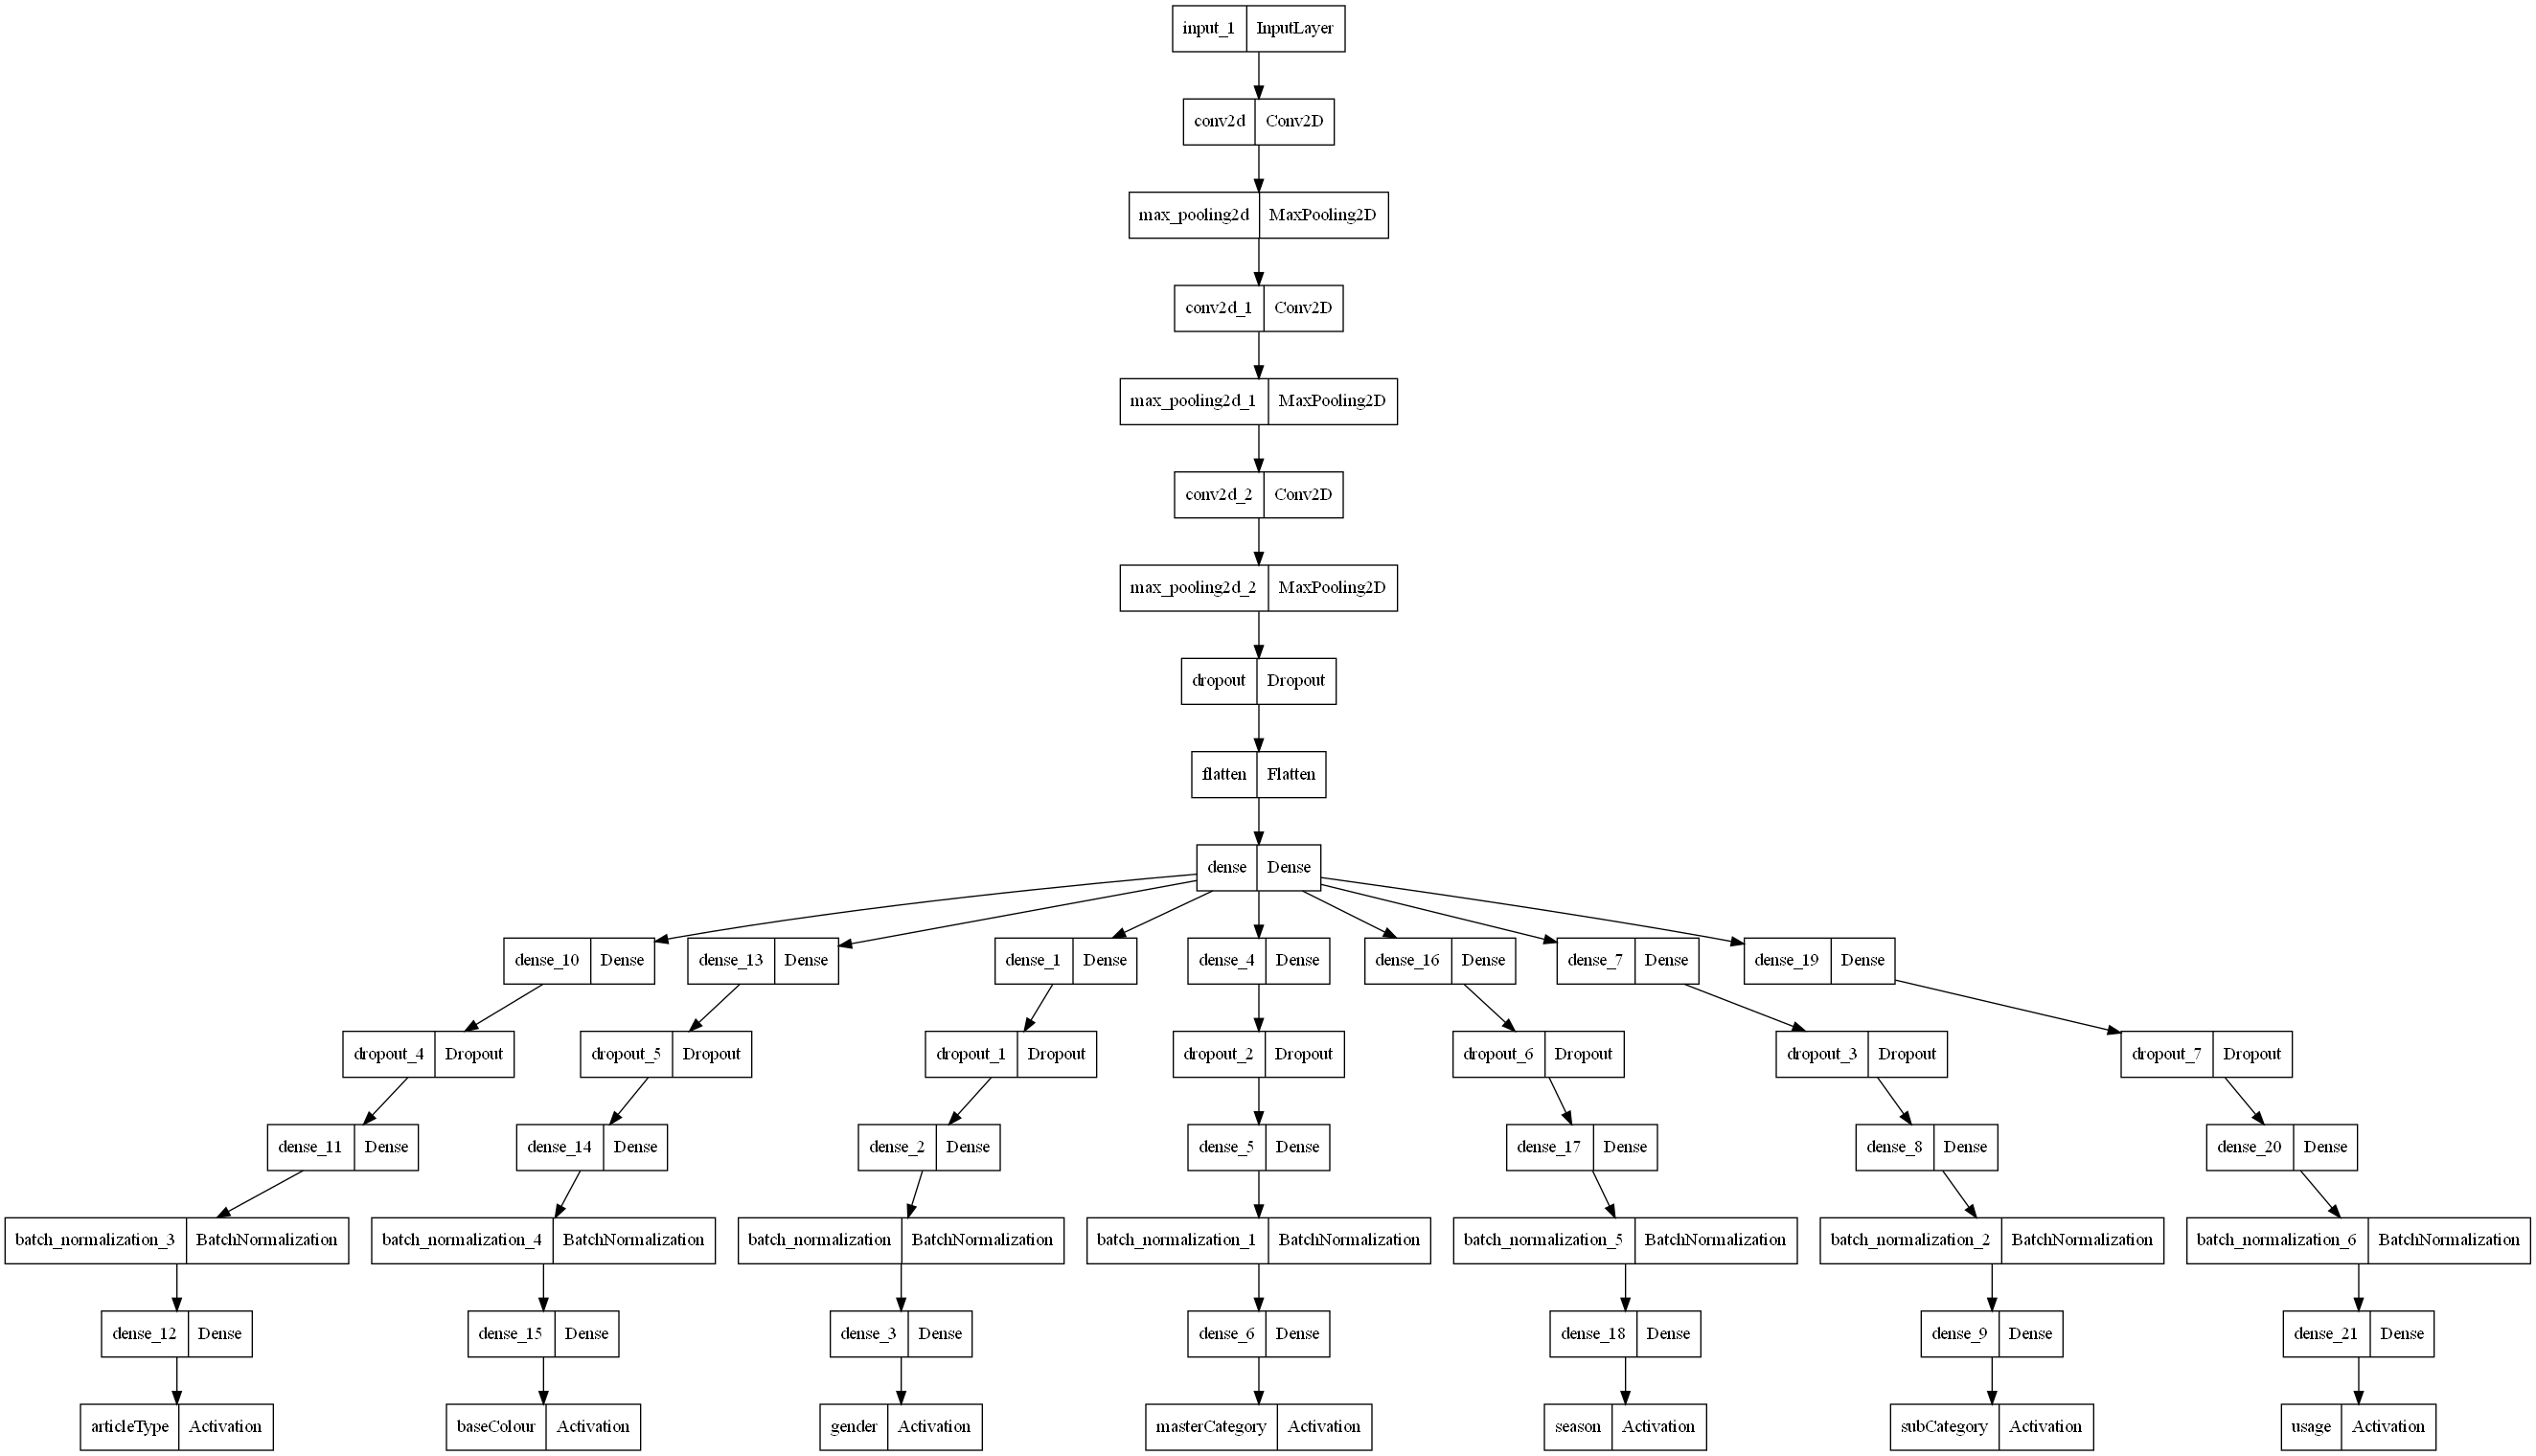

In [24]:
keras.utils.plot_model(model)

In [25]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [26]:
outputs = model.predict(X_images)

1378/1378 [==============================] - 25s 18ms/step


In [27]:
import pickle

In [28]:
lable_encoders = {}

In [29]:
for lable in output_lables:
    # Hydrate the serialized objects.
    with open('encoders/encoder_{}.pkl'.format(lable), 'rb') as f:
        lable_encoders[lable] = pickle.load(f)

In [30]:
predictions = {}

In [31]:
for lable in output_lables:
    predictions[lable] = lable_encoders[lable].classes_[outputs[lable].argmax(axis=1)]

In [32]:
predictions[lable]

array(['Casual', 'Casual', 'Casual', ..., 'Casual', 'Casual', 'Casual'],
      dtype='<U12')

In [33]:
df_predictions = pd.DataFrame.from_dict(predictions)

In [34]:
df_outputs = pd.concat([X_filepath,df_predictions],axis=1)

In [76]:
df_outputs.head()

,filename,gender,masterCategory,subCategory,articleType,baseColour,season,usage
0,dataset/fashion-product-images-small/images/15...,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,Casual
1,dataset/fashion-product-images-small/images/39...,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual
2,dataset/fashion-product-images-small/images/59...,Women,Accessories,Watches,Watches,Silver,Winter,Casual
3,dataset/fashion-product-images-small/images/21...,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual
4,dataset/fashion-product-images-small/images/53...,Men,Apparel,Topwear,Tshirts,Grey,Summer,Casual


In [40]:
df_outputs.to_csv("fashion_database.csv", index=False)